# 参数设置

In [2]:
ACCESS_TOKEN = "24.a2a52efe2d9565985bac1a0164647885.2592000.1594082650.282335-20267153"
ACCESS_TOKEN_2 = "24.441e824929264c84c1d1231938930a4f.2592000.1594437662.282335-20342396"

In [3]:
import json
import requests
from PIL import Image

In [4]:
import base64

In [5]:
DEMO_PATH_1 = "E:/[Github]/CUCBiye/API/demo_1.jpg"
DEMO_PATH_2 = "E:/[Github]/CUCBiye/API/demo_2.jpeg"
DEMO_PATH_3 = "E:/[Github]/CUCBiye/API/demo_3.jpeg"
DEMO_PATH_4 = "E:/[Github]/CUCBiye/API/demo_4.jpg"
DEMO_PATH_5 = "E:/[Github]/CUCBiye/API/demo_5.jpg"
DEMO_PATH_6 = "E:/[Github]/CUCBiye/API/demo_6.jpg"

In [6]:
def load_file_in_base64(path):
    """
    载入文件并进行Base64编码

    :param path: <str> 文件路径
    :return: <str> Base64编码后的文件
    """
    with open(path, 'rb') as f:
        return str(base64.b64encode(f.read()), encoding='utf-8')

In [7]:
def face_detect(demo_base64):
    """
    人脸监测和属性分析
    :param demo_base64: <str> BASE64格式的目标图
    :return:
    """
    request_url = "https://aip.baidubce.com/rest/2.0/face/v3/detect"

    params = json.dumps({
        "image": demo_base64,
        "image_type": "BASE64",
        "face_field": "age,beauty,expression,face_shape,gender,glasses,landmark,landmark150,race,quality,eye_status,emotion,face_type,mask,spoofing"
    })

    request_url = request_url + "?access_token=" + ACCESS_TOKEN
    headers = {'content-type': 'application/json'}
    response = requests.post(request_url, data=params, headers=headers)
    if response:
        return response.json()

In [8]:
import matplotlib.pyplot as plt
import copy
from PIL import ImageDraw
import math

# 加载学士帽

In [8]:
HAT_DEMO_PATH_1 = "E:/[Github]/CUCBiye/API/hat_demo_1.png"
HAT_DEMO_PATH_2 = "E:/[Github]/CUCBiye/API/hat_demo_2.png"

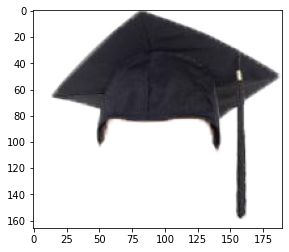

In [9]:
hat_img=Image.open(HAT_DEMO_PATH_2).convert('RGBA')
plt.imshow(hat_img)

# 人脸检验

In [15]:
demo_base64 = load_file_in_base64(DEMO_PATH_2)  # 载入目标图

In [16]:
detect_result = face_detect(demo_base64)  # 请求API

In [20]:
detect_result

{'error_code': 0,
 'error_msg': 'SUCCESS',
 'log_id': 2011500165201,
 'timestamp': 1591846328,
 'cached': 0,
 'result': {'face_num': 1,
  'face_list': [{'face_token': 'b565068b419c75cb0583e0336ef911b0',
    'location': {'left': 309.4,
     'top': 143.61,
     'width': 166,
     'height': 159,
     'rotation': 13},
    'face_probability': 1,
    'angle': {'yaw': -13.83, 'pitch': 6.54, 'roll': 12.72},
    'age': 22,
    'beauty': 84.7,
    'expression': {'type': 'none', 'probability': 1},
    'face_shape': {'type': 'oval', 'probability': 0.35},
    'gender': {'type': 'female', 'probability': 1},
    'glasses': {'type': 'none', 'probability': 1},
    'landmark': [{'x': 366.35, 'y': 188.46},
     {'x': 434.39, 'y': 205.55},
     {'x': 401.59, 'y': 241.92},
     {'x': 386.11, 'y': 278.1}],
    'landmark72': [{'x': 301.46, 'y': 175.52},
     {'x': 299.6, 'y': 204.09},
     {'x': 299.92, 'y': 233.12},
     {'x': 305.07, 'y': 262.93},
     {'x': 323.49, 'y': 292.9},
     {'x': 348.51, 'y': 314

In [21]:
detect_result["result"]["face_list"][0]["location"]

{'left': 309.4, 'top': 143.61, 'width': 166, 'height': 159, 'rotation': 13}

In [22]:
point_26 = detect_result["result"]["face_list"][0]["landmark72"][26]
point_26

{'x': 394, 'y': 174.53}

In [23]:
point_39 = detect_result["result"]["face_list"][0]["landmark72"][39]
point_39

{'x': 425.66, 'y': 183.64}

In [24]:
point_57 = detect_result["result"]["face_list"][0]["landmark72"][57]
point_57

{'x': 401.59, 'y': 241.92}

In [25]:
left = round(detect_result["result"]["face_list"][0]["location"]["left"])
top = round(detect_result["result"]["face_list"][0]["location"]["top"])
width = round(detect_result["result"]["face_list"][0]["location"]["width"])
height = round(detect_result["result"]["face_list"][0]["location"]["height"])
rotation = round(detect_result["result"]["face_list"][0]["location"]["rotation"])

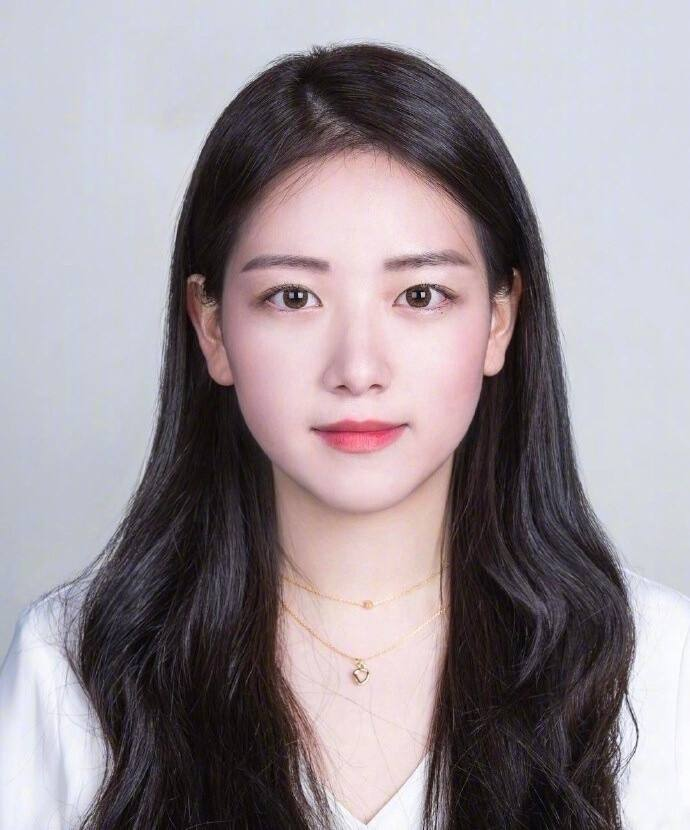

In [22]:
img=Image.open(DEMO_PATH_1)
img

## 脸部边框

In [66]:
# 左上角点
point_1 = (left,top)
# 右上角点
point_2 = (left+width*math.sin(math.pi*(90-rotation)/180),top+width*math.cos(math.pi*(90-rotation)/180))
# 右下角点
point_3 = (point_2[0]-height*math.cos(math.pi*(90-rotation)/180),point_2[1]+height*math.sin(math.pi*(90-rotation)/180))
# 左下角点
point_4 = (left-height*math.sin(math.pi*rotation/180),top+height*math.cos(math.pi*rotation/180))

## 眉心坐标

In [67]:
eyebrow_point = ((point_26["x"]+point_39["x"])/2,(point_26["y"]+point_39["y"])/2)
eyebrow_point

(409.83000000000004, 179.08499999999998)

## 鼻尖坐标

In [68]:
nose_point = (point_57["x"],point_57["y"])
nose_point

(401.59, 241.92)

## 发际线中点

In [69]:
hair_point = (2*eyebrow_point[0]-1*nose_point[0],2*eyebrow_point[1]-1*nose_point[1])
hair_point

(418.0700000000001, 116.24999999999997)

## 标点绘图

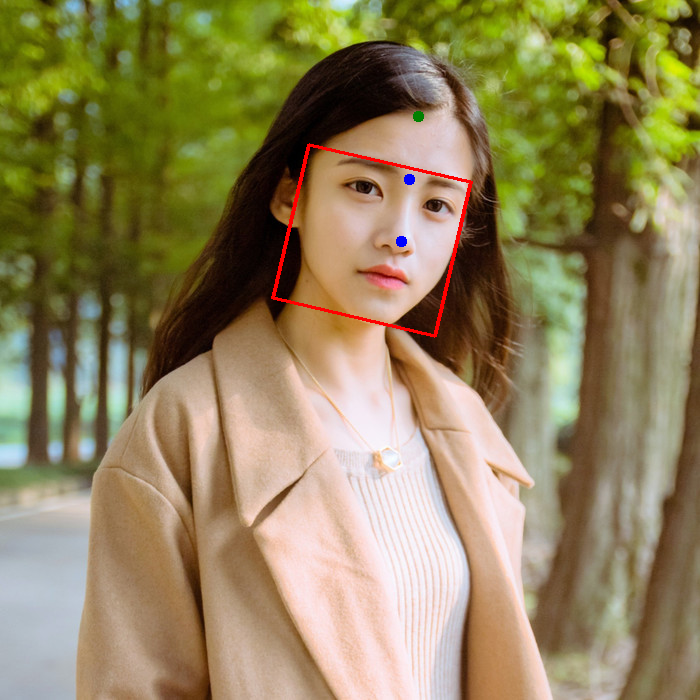

In [70]:
# 画圆方法参考：https://www.jianshu.com/p/cdea3ba63cd7
draw = ImageDraw.Draw(img)
draw.line([point_1,point_2,point_3,point_4,point_1],width=4,fill='red')
draw.ellipse((eyebrow_point[0]-5,eyebrow_point[1]-5,eyebrow_point[0]+5,eyebrow_point[1]+5),fill="blue")
draw.ellipse((nose_point[0]-5,nose_point[1]-5,nose_point[0]+5,nose_point[1]+5),fill="blue")
draw.ellipse((hair_point[0]-5,hair_point[1]-5,hair_point[0]+5,hair_point[1]+5),fill="green")
img

# 学士帽处理

In [32]:
hat_change = copy.deepcopy(hat_img)

In [33]:
hat_img.size
big_size = 1.2
hat_actual_width = 93

In [34]:
hat_width = int(big_size*width/hat_actual_width*hat_img.size[0])
hat_height = int(hat_width/hat_img.size[0]*hat_img.size[1])
hat_width,hat_height

(406, 354)

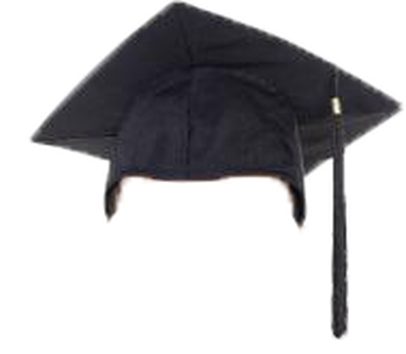

In [35]:
# 缩放参考方法：https://blog.csdn.net/wsl985/article/details/90319943
hat_change = hat_change.resize((hat_width,hat_height),Image.ANTIALIAS)
hat_change

In [36]:
hat_change.size

(406, 354)

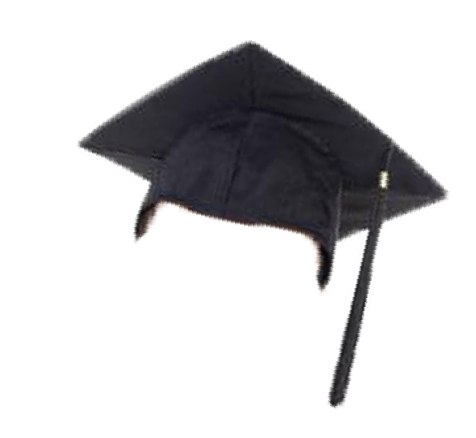

In [37]:
# 旋转参考方法：https://www.cnblogs.com/brainstorming/p/7651506.html
hat_rotate = hat_change.rotate(-rotation,expand=True)
hat_rotate

In [38]:
hat_rotate.size

(476, 438)

# 戴帽子

In [39]:
hat_left = int(hair_point[0]-hat_rotate.size[0]/2)
hat_top = int(hair_point[1]-hat_rotate.size[1]/2)

In [40]:
merge_img = copy.deepcopy(img)

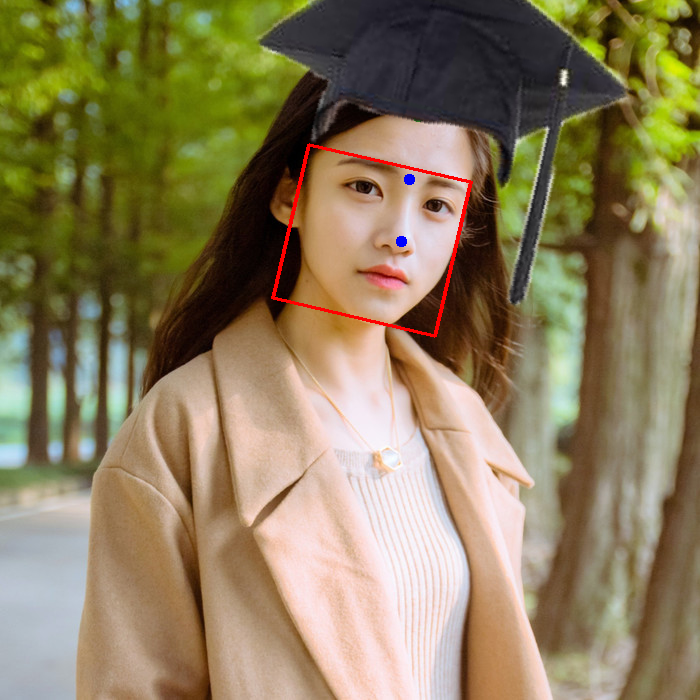

In [41]:
# 图片粘贴方法参考：https://blog.csdn.net/haeasringnar/article/details/103895140
# PNG透明方法参考：https://www.jianshu.com/p/8ea7f1057875
merge_img.paste(hat_rotate, (hat_left, hat_top), hat_rotate)
merge_img

# 人体关键点坐标

In [17]:
def body_analysis(demo_base64):
    """
    人脸监测和属性分析
    :param demo_base64: <str> BASE64格式的目标图
    :return:
    """
    request_url = "https://aip.baidubce.com/rest/2.0/image-classify/v1/body_analysis"

    params = {"image": demo_base64}

    request_url = request_url + "?access_token=" + ACCESS_TOKEN_2
    headers = {'content-type': 'application/x-www-form-urlencoded'}
    response = requests.post(request_url, data=params, headers=headers)
    if response:
        return response.json()

In [18]:
body_result = body_analysis(demo_base64)  # 请求API

In [19]:
body_result["person_info"][0]["body_parts"]

{'left_hip': {'y': 694.48828125,
  'x': 418.45703125,
  'score': 0.09058690071105957},
 'top_head': {'y': 75.73828125,
  'x': 412.01171875,
  'score': 0.7968325614929199},
 'right_mouth_corner': {'y': 281.98828125,
  'x': 354.00390625,
  'score': 0.9079938530921936},
 'neck': {'y': 346.44140625, 'x': 334.66796875, 'score': 0.7694234848022461},
 'left_shoulder': {'y': 417.33984375,
  'x': 463.57421875,
  'score': 0.7448326945304871},
 'left_knee': {'y': 662.26171875,
  'x': 495.80078125,
  'score': 0.0316317081451416},
 'left_ankle': {'y': 655.81640625,
  'x': 399.12109375,
  'score': 0.02697796002030373},
 'left_mouth_corner': {'y': 269.09765625,
  'x': 412.01171875,
  'score': 0.8744943737983704},
 'right_elbow': {'y': 681.59765625,
  'x': 154.19921875,
  'score': 0.6252638697624207},
 'right_ear': {'y': 198.19921875,
  'x': 289.55078125,
  'score': 0.8250755071640015},
 'nose': {'y': 243.31640625, 'x': 399.12109375, 'score': 0.8931615352630615},
 'left_eye': {'y': 191.75390625,
  'x'

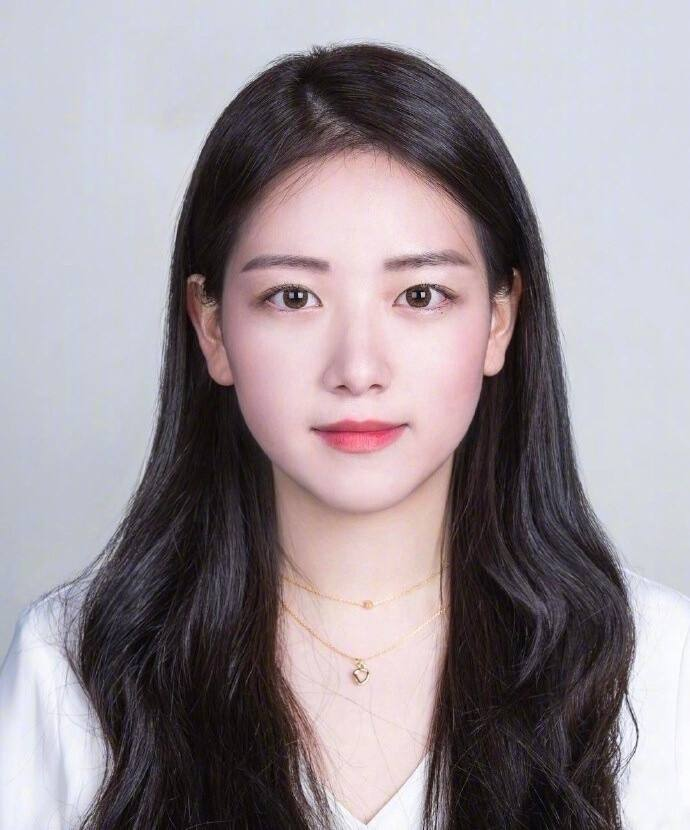

In [26]:
img=Image.open(DEMO_PATH_1)
img

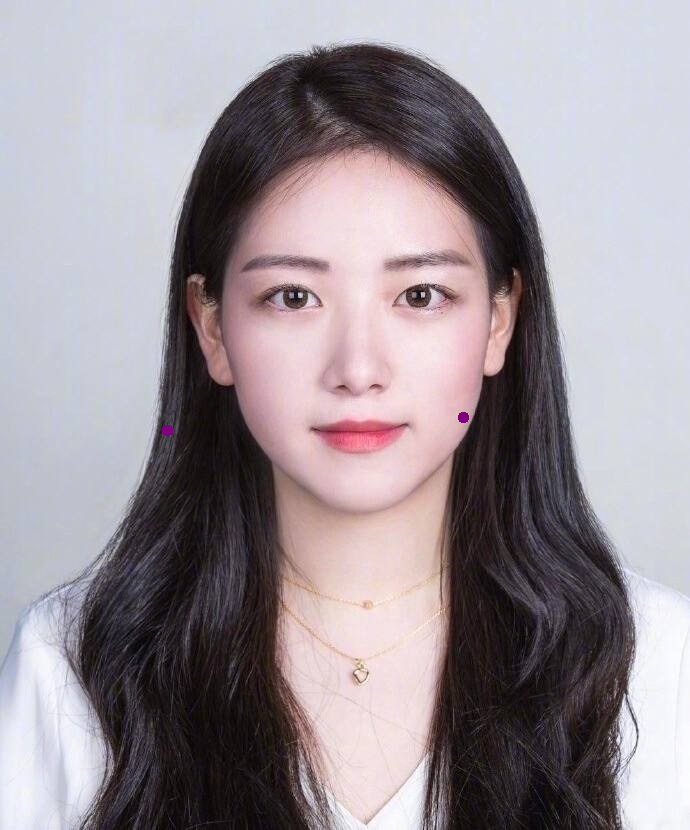

In [27]:
draw_2 = ImageDraw.Draw(img)
for name,value in body_result["person_info"][0]["body_parts"].items():
    if value["score"]<0.5:
        continue
    if "shoulder" not in name:
        continue
    draw_2.ellipse((value["x"]-5,value["y"]-5,value["x"]+5,value["y"]+5),fill="purple")
img